## This is an example of a Ipython Notebook (.ipnyb)

First, this text here is called "markdown" It is a simple text formating scheme that meshes well with HTML. Ipytohn notebooks are set up to seemlessly have text, code, and images together. Now below is a "code cell"

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib.pyplot as plt

print('\nPython version: ', sys.version)
print('Pandas version: ', pd.__version__, '\n')


Python version:  3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.21.0 



The output above simply reports the commands. Then the text blow reports some data:

In [16]:
url = 'http://www.ggdc.net/maddison/maddison-project/data/mpd_2013-01.xlsx'
mpd = pd.read_excel(url, skiprows=2, index_col=0, na_values=[' '])
# strip trailing blanks in country names
# use comprehension instead? string methods?
mpd.columns = map(str.rstrip, mpd.columns)

print('Dataframe dimensions:', mpd.shape)

countries = ['England/GB/UK', 'USA', 'Japan', 'China', 'India', 'Argentina']
mpd = mpd[countries]
mpd = mpd.rename(columns={'England/GB/UK': 'UK'})
mpd = np.log(mpd)/np.log(2)

print('Dataframe dimensions:', mpd.shape)

Dataframe dimensions: (229, 184)
Dataframe dimensions: (229, 6)


This tells us something about the size of the data. The first print out is before we dropped the countries, then the second is after have pulled out select countries. Then plot how GDP has evolved over time.

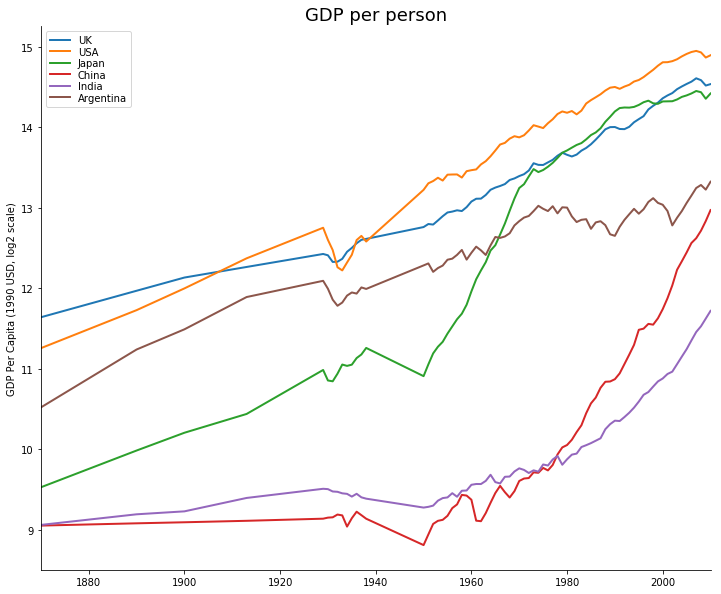

In [21]:
subset = mpd.dropna().copy()

fig, ax = plt.subplots(figsize=(12,10))
subset.plot(lw=2, ax=ax)
ax.set_title('GDP per person', fontsize=18, loc='center')
ax.set_ylabel('GDP Per Capita (1990 USD, log2 scale)')
ax.legend(loc='upper left', fontsize=10, handlelength=2, labelspacing=0.15)

ax.set_xlim(1870,2010) # This sets the y-limits

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

plt.show()